In [1]:
# Notebook largely inspired by https://www.kaggle.com/code/arnaslaurinaviius/beat-my-score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

base_root = "../data/original"

In [2]:
train_transactions = pd.read_csv(base_root + "/train_transaction.csv")
train_identity = pd.read_csv(base_root + "/train_identity.csv")
train_df = train_transactions.merge(train_identity, how="left", on="TransactionID")
train_df.set_index('TransactionID', inplace=True)
train_df = train_df[list(set(train_df.columns) - {"isFraud"}) + ["isFraud"]]
train_df = train_df.fillna(-999)
y = train_df["isFraud"].astype(np.uint8)
del train_transactions, train_identity

In [3]:
for f in train_df.columns:
    if train_df[f].dtype == "object":
        lbl = LabelEncoder()
        lbl.fit(list(train_df[f].values))
        train_df[f] = lbl.transform(list(train_df[f].values))

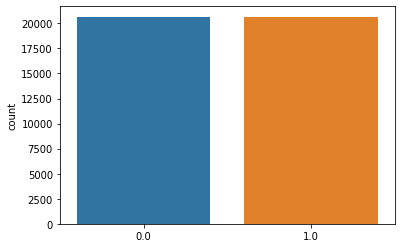

In [4]:
data = train_df.to_numpy()

X_maj = data[data[:, -1] == 0]
X_min = data[data[:, -1] == 1]
size_minor = len(X_min)

# Downsample majority class
X_maj_downsampled = resample(
    X_maj,
    replace=False,
    n_samples=size_minor,
    random_state=42
)

data_down = np.concatenate([X_min, X_maj_downsampled])

X_down = data_down[:, :-1]
y_down = data_down[:, -1]

sns.countplot(x = y_down);

In [5]:
np.save("../data/fraud-detection-v4.npy", data_down)